In [ ]:
# Various usages 
import pandas as pd
import os
import numpy as np    

#Preproccesing
import nltk
nltk.download("punkt")
nltk.download("stopwords")  
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer


#Applying Classifiers

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#UnZipping Our Folder

from zipfile import ZipFile
file_name = "/20_newsgroups.zip"
with ZipFile( file_name , 'r') as zip: 
 zip.extractall() 

In [ ]:
#Main folder
parent_dir = "/content/20_newsgroups"

folder_names = ["alt.atheism", "comp.graphics", "comp.os.ms-windows.misc", "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware", "comp.windows.x", "misc.forsale", "rec.autos", "rec.motorcycles", "rec.sport.baseball", "rec.sport.hockey", "sci.crypt", "sci.electronics", "sci.med", "sci.space", "soc.religion.christian", "talk.politics.guns", "talk.politics.mideast", "talk.politics.misc", "talk.religion.misc"]

# Define a dictionary to store the text data for each folder
data = {}

for folder_name in folder_names:
    folder_path = os.path.join(parent_dir, folder_name)                                    #This line of code constructs the full path to the current folder 
    if os.path.isdir(folder_path):                                                         #If it is actually a folder
        file_names = os.listdir(folder_path)                                               #Get names of folders
        folder_data = []                                                                   #List for each folder to save the text data
        for file_name in file_names:
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, encoding="utf8", errors='ignore') as file:   #(With) do automatic close
                text = file.read()
                folder_data.append(text)
        data[folder_name] = folder_data        

In [ ]:
                                         #Preprocessing

preprocessed_data = {}
for folder_name, folder_data in data.items():
    preprocessed_data[folder_name] = []    
    for text in folder_data:
        # Tokenize the text
        tokens = word_tokenize(text)
        # Lowercase the tokens
        tokens = [token.lower() for token in tokens]
        # Remove stopwords
        stop_words = set(stopwords.words("english"))
        tokens = [token for token in tokens if token not in stop_words]
        # Stem the tokens
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]
        # Add the preprocessed text to the dictionary
        preprocessed_text = " ".join(tokens)
        #Our preprocessed data 
        preprocessed_data[folder_name].append(preprocessed_text)   
   

In [ ]:
                                               #Feature Extraction by TF-IDF
                                         #""Term Frequency-Inverse Document Frequency""

corpus = []
for folder_data in preprocessed_data.values():
    corpus += folder_data

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

feature_names = vectorizer.get_feature_names_out()


# Get the TF-IDF scores for each folder and print the top 10 features with their scores , "Features" = "Words"
for folder_name, folder_data in preprocessed_data.items():
    folder_tfidf = tfidf_matrix[:len(folder_data)]        #Get rows to the corresponding folder lly ana wa2ef 3aleh fy el loop da
    folder_scores = folder_tfidf.mean(axis=0).tolist()[0] #[0] is to extract the mean scores from the list  
    #axis = 0 ana shghal 3la row       
    folder_scores_dict = {}
    for i, score in enumerate(folder_scores):  #enumerates return (index and value) 
        feature_name = feature_names[i]
        folder_scores_dict[feature_name] = score

    #lambda function that takes a tuple x as input and returns its second element " TF-IDF score" and ignore index
    sorted_scores = sorted(folder_scores_dict.items(), key=lambda x: x[1], reverse=True) 
    #reverse = true means descending order

    top_features = [(term, score) for term, score in sorted_scores[:10]]
    print(f"Top features for folder {folder_name}:")
    for term, score in top_features:
        print(f"{term}: {score}")     


Top features for folder alt.atheism:
edu: 0.09350375782825518
com: 0.04334177087944311
ath: 0.04188046887332302
alt: 0.040294421076002625
moral: 0.036655157737371005
caltech: 0.03341921893612259
sgi: 0.03327130288330235
god: 0.0322677480340655
cmu: 0.027298678169116845
religion: 0.025415007354660714
Top features for folder comp.graphics:
edu: 0.09350375782825518
com: 0.04334177087944311
ath: 0.04188046887332302
alt: 0.040294421076002625
moral: 0.036655157737371005
caltech: 0.03341921893612259
sgi: 0.03327130288330235
god: 0.0322677480340655
cmu: 0.027298678169116845
religion: 0.025415007354660714
Top features for folder comp.os.ms-windows.misc:
edu: 0.09350375782825518
com: 0.04334177087944311
ath: 0.04188046887332302
alt: 0.040294421076002625
moral: 0.036655157737371005
caltech: 0.03341921893612259
sgi: 0.03327130288330235
god: 0.0322677480340655
cmu: 0.027298678169116845
religion: 0.025415007354660714
Top features for folder comp.sys.ibm.pc.hardware:
edu: 0.09350375782825518
com: 0.0

In [ ]:
#@title Default title text
                                         #Training and Testing




# Create the input data and target labels for the machine learning models

X = tfidf_matrix
y = []
for folder_name in preprocessed_data.keys():
    y += [folder_name] * len(preprocessed_data[folder_name])    #Occures 1 time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = [
    MultinomialNB(),     #Naive bayes ---> Assume each feature is mulinomial onae , classify into discrete categories
    LogisticRegression(),
    LinearSVC()
]

# Define lists to store the names , accuracies , confusion matrices of the classifiers
classifier_names = []
classifier_accuracies = []
classifier_ConfusionMatrix = []



for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    # Compute the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    # Append the name and accuracy of the classifier to the lists
    classifier_names.append(type(classifier).__name__)
    classifier_accuracies.append(accuracy)
    # Compute the confusion matrix of the classifier
    ConfusionMatrix = confusion_matrix(y_test,y_pred)
    classifier_ConfusionMatrix.append(ConfusionMatrix)
    print(type(classifier).__name__)
    print(classifier_ConfusionMatrix)


MultinomialNB
[array([[146,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   0,   0,   0,  26],
       [  0, 153,   4,   8,   1,   3,   1,   1,   1,   0,   0,   3,   1,
          0,   2,   0,   1,   0,   0,   0],
       [  0,   4, 207,   7,   0,   4,   1,   0,   0,   0,   0,   1,   1,
          0,   1,   0,   0,   0,   0,   0],
       [  1,   5,   3, 180,   5,   1,   4,   0,   0,   0,   0,   2,   1,
          0,   1,   0,   0,   0,   0,   1],
       [  1,   3,   1,   9, 186,   0,   1,   0,   0,   1,   0,   1,   1,
          0,   1,   0,   0,   0,   0,   0],
       [  1,   6,   7,   3,   1, 158,   0,   1,   3,   0,   1,   1,   0,
          1,   2,   0,   0,   0,   0,   1],
       [  0,   0,   1,   3,   0,   0, 173,   7,   0,   0,   0,   0,   2,
          1,   1,   0,   1,   0,   0,   1],
       [  0,   1,   0,   0,   0,   0,   3, 185,   3,   2,   0,   0,   1,
          1,   1,   0,   3,   0,   3,   0],
       [  0,   0,   0,   1,   0,   0,   3,   4, 2

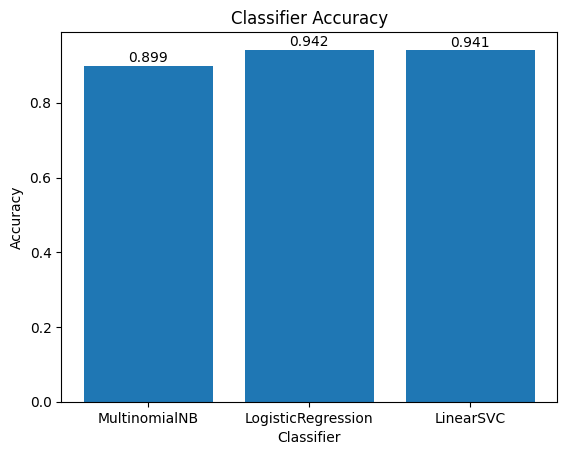

In [ ]:
plt.bar(classifier_names, classifier_accuracies)
plt.title("Classifier Accuracy")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")

# Add text showing the accuracy of each classifier
for i, acc in enumerate(classifier_accuracies):
    plt.text(i, acc+0.01, f"{acc:.3f}", ha='center')          #x posotion of label , y position of label , #text to display
plt.show()